In [32]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif']


In [33]:
df = pd.read_csv("EV_Data.csv")

In [34]:
df.head()

,Unnamed: 0.1,Unnamed: 0,state,year,EV Registrations,Total Vehicles,EV Share (%),Stations,Total Charging Outlets,Level 1,...,personal,reducetax,regulate,worried,price_cents_per_kwh,gasoline_price_per_gallon,Total,Trucks,Trucks_Share,Party
0,0,0,Alabama,2023,13000,4835900,0.27,424,1096,35,...,39.06,62.16,69.01,54.95,11.47,2.742,5446619.0,3.397137e+06,62.37,Republican
1,1,1,Alaska,2023,2700,559800,0.48,65,124,3,...,43.28,65.38,71.61,62.49,21.41,3.594,680974.0,5.175250e+05,76.00,Republican
2,2,2,Arizona,2023,89800,6529000,1.38,1198,3506,9,...,46.92,64.73,73.19,64.32,12.19,3.278,6447062.0,3.868118e+06,60.00,Democratic
3,3,3,Arkansas,2023,7100,2708300,0.26,334,833,3,...,39.08,63.39,68.58,56.21,9.73,2.760,3338322.0,2.291924e+06,68.65,Republican
4,4,4,California,2023,1256600,36850300,3.41,16381,49433,648,...,53.19,72.08,76.30,71.24,24.87,4.731,31057329.0,1.675788e+07,53.96,Democratic


## Null Exploration

From this information, we can see that the columns of index 12-14, 21-29, and 31-35 have some number of rows with null values. 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           408 non-null    int64  
 1   Unnamed: 0                             408 non-null    int64  
 2   state                                  408 non-null    object 
 3   year                                   408 non-null    int64  
 4   EV Registrations                       408 non-null    int64  
 5   Total Vehicles                         408 non-null    int64  
 6   EV Share (%)                           408 non-null    float64
 7   Stations                               408 non-null    int64  
 8   Total Charging Outlets                 408 non-null    int64  
 9   Level 1                                408 non-null    int64  
 10  Level 2                                408 non-null    int64  
 11  DC Fas

In [36]:
df.shape

(408, 36)

<br><br>There are 158 rows where there contains some missing values

In [37]:
rows_missing_values = df[df.isnull().any(axis=1)].reset_index()
rows_missing_values.head()

,index,Unnamed: 0.1,Unnamed: 0,state,year,EV Registrations,Total Vehicles,EV Share (%),Stations,Total Charging Outlets,...,personal,reducetax,regulate,worried,price_cents_per_kwh,gasoline_price_per_gallon,Total,Trucks,Trucks_Share,Party
0,8,8,8,District Of Columbia,2023,8100,312100,2.60,369,1158,...,58.57,76.55,82.28,76.05,16.50,3.174,NaN,NaN,NaN,NaN
1,59,59,59,District Of Columbia,2022,5900,319400,1.85,301,972,...,57.38,74.49,81.70,74.82,14.94,3.070,NaN,NaN,NaN,NaN
2,110,110,110,District Of Columbia,2021,3700,321700,1.15,291,826,...,58.87,73.21,79.77,76.01,12.81,2.883,NaN,NaN,NaN,NaN
3,161,161,161,District Of Columbia,2020,2400,318300,0.75,189,694,...,49.52,73.82,78.66,74.27,11.90,2.694,NaN,NaN,NaN,NaN
4,204,204,204,Alabama,2019,2000,4593200,0.04,195,506,...,35.54,60.31,68.20,51.38,9.83,2.295,5288208.452,3065777.868,57.97,Republican


<br><br>From rows_missing_values variable and from scanning the raw csv file, it is apparent that most of the empty cells in this csv are
<br> empty because there was no data collection several column features prior to 2018. From this code  below, we can see that there are 
<br> an equal number of rows from the df that are in the years 2016 or 2017 as there are rows in the missing values df that are in the 
<br> years 2016 or 2017. Therefore our observation is verified. 

In [38]:
all_rows_2016_2017 = df[(df["year"].isin([2016,2017]))]

print(all_rows_2016_2017.shape[0])

num_of_2016_2017_rows_missing_values = rows_missing_values[(rows_missing_values["year"].isin([2016,2017]))]
print(num_of_2016_2017_rows_missing_values.shape[0])

102
102


<br><br>There are null values in columns of index 12, 21-29, and 31-35.

In [39]:
cols_null_2016_2017 = num_of_2016_2017_rows_missing_values.columns[num_of_2016_2017_rows_missing_values.isnull().all()].tolist()
cols_null_2016_2017

['fuel_economy',
 'affectweather',
 'devharm',
 'discuss',
 'exp',
 'localofficials',
 'personal',
 'reducetax',
 'regulate',
 'worried',
 'gasoline_price_per_gallon',
 'Total',
 'Trucks',
 'Trucks_Share',
 'Party']

<br><br>There is a set of 8 rows that contain some null value whose state is DC.

In [40]:
dc_rows = df[df["state"]== "District Of Columbia"].reset_index()
dc_rows.head()

,index,Unnamed: 0.1,Unnamed: 0,state,year,EV Registrations,Total Vehicles,EV Share (%),Stations,Total Charging Outlets,...,personal,reducetax,regulate,worried,price_cents_per_kwh,gasoline_price_per_gallon,Total,Trucks,Trucks_Share,Party
0,8,8,8,District Of Columbia,2023,8100,312100,2.60,369,1158,...,58.57,76.55,82.28,76.05,16.50,3.174,NaN,NaN,NaN,NaN
1,59,59,59,District Of Columbia,2022,5900,319400,1.85,301,972,...,57.38,74.49,81.70,74.82,14.94,3.070,NaN,NaN,NaN,NaN
2,110,110,110,District Of Columbia,2021,3700,321700,1.15,291,826,...,58.87,73.21,79.77,76.01,12.81,2.883,NaN,NaN,NaN,NaN
3,161,161,161,District Of Columbia,2020,2400,318300,0.75,189,694,...,49.52,73.82,78.66,74.27,11.90,2.694,NaN,NaN,NaN,NaN
4,212,212,212,District Of Columbia,2019,1800,329300,0.55,172,553,...,56.83,72.94,78.21,74.97,12.27,2.657,NaN,NaN,NaN,NaN


<br><br>There are null values in columns of index 13 and 32-35

In [41]:
cols_null_dc = dc_rows.columns[dc_rows.isnull().all()].tolist()
cols_null_dc

['Incentives', 'Total', 'Trucks', 'Trucks_Share', 'Party']

In [42]:
num_of_dc_rows = rows_missing_values[rows_missing_values["state"] == "District Of Columbia"].shape
num_of_dc_rows[0]

8

<br><br>There are now still 50 rows that are neither DC, nor priot to 2018 that have null values. Our information on null counts 
<br> from the .info() method indicates that 

In [43]:
leftover_missing_value_rows = rows_missing_values[(rows_missing_values["state"] != "District Of Columbia") & (~rows_missing_values["year"].isin([2016, 2017]))].reset_index()
print(leftover_missing_value_rows.shape[0])

50


In [44]:
leftover_missing_value_rows.head()

,level_0,index,Unnamed: 0.1,Unnamed: 0,state,year,EV Registrations,Total Vehicles,EV Share (%),Stations,...,personal,reducetax,regulate,worried,price_cents_per_kwh,gasoline_price_per_gallon,Total,Trucks,Trucks_Share,Party
0,4,204,204,204,Alabama,2019,2000,4593200,0.04,195,...,35.54,60.31,68.20,51.38,9.83,2.295,5.288208e+06,3.065778e+06,57.97,Republican
1,5,205,205,205,Alaska,2019,700,602500,0.12,19,...,39.80,61.41,71.68,57.80,20.22,3.008,7.952747e+05,5.799846e+05,72.93,Republican
2,6,206,206,206,Arizona,2019,19500,6217700,0.31,522,...,42.51,62.29,71.20,60.81,10.52,2.744,5.982559e+06,3.407708e+06,56.96,Republican
3,7,207,207,207,Arkansas,2019,900,2594900,0.03,98,...,34.92,61.67,68.92,53.68,8.22,2.310,2.902111e+06,1.833636e+06,63.18,Republican
4,8,208,208,208,California,2019,349700,33671900,1.04,6439,...,51.74,70.12,74.43,71.42,16.89,3.959,3.124727e+07,1.544345e+07,49.42,Democratic


<br><br>Based on the columns we found have null values (12-14, 21-29, and 31-35) and the columns where rows with state as DC (13 and 32-35)
<br> and the columns where year is 2016 or 2017 (12, 21-29, and 31-35), we can assume that some of the 50 columns in leftover_missing_value_rows
<br> have null values in the remaining column 14 ("Number of Metro Organizing Committees"). 

In [45]:
committee_row_values = rows_missing_values[rows_missing_values["Number of Metro Organizing Committees"].isnull()]
committee_row_values

,index,Unnamed: 0.1,Unnamed: 0,state,year,EV Registrations,Total Vehicles,EV Share (%),Stations,Total Charging Outlets,...,personal,reducetax,regulate,worried,price_cents_per_kwh,gasoline_price_per_gallon,Total,Trucks,Trucks_Share,Party
4,204,204,204,Alabama,2019,2000,4593200,0.04,195,506,...,35.54,60.31,68.20,51.38,9.83,2.295,5.288208e+06,3.065778e+06,57.97,Republican
5,205,205,205,Alaska,2019,700,602500,0.12,19,34,...,39.80,61.41,71.68,57.80,20.22,3.008,7.952747e+05,5.799846e+05,72.93,Republican
6,206,206,206,Arizona,2019,19500,6217700,0.31,522,1476,...,42.51,62.29,71.20,60.81,10.52,2.744,5.982559e+06,3.407708e+06,56.96,Republican
7,207,207,207,Arkansas,2019,900,2594900,0.03,98,290,...,34.92,61.67,68.92,53.68,8.22,2.310,2.902111e+06,1.833636e+06,63.18,Republican
8,208,208,208,California,2019,349700,33671900,1.04,6439,27199,...,51.74,70.12,74.43,71.42,16.89,3.959,3.124727e+07,1.544345e+07,49.42,Democratic
9,209,209,209,Colorado,2019,19200,5249400,0.37,861,2516,...,42.84,62.86,71.95,62.57,10.17,2.639,5.412404e+06,3.471825e+06,64.15,Democratic
10,210,210,210,Connecticut,2019,6900,2972700,0.23,422,1048,...,43.77,72.49,77.23,68.35,18.66,2.547,2.878548e+06,1.520176e+06,52.81,Democratic
11,211,211,211,Delaware,2019,1300,894900,0.15,57,172,...,43.47,65.70,73.43,61.12,10.52,2.481,1.016927e+06,5.613232e+05,55.20,Democratic
12,212,212,212,District Of Columbia,2019,1800,329300,0.55,172,553,...,56.83,72.94,78.21,74.97,12.27,2.657,NaN,NaN,NaN,NaN
13,213,213,213,Florida,2019,40300,17071200,0.24,1562,4562,...,43.44,65.32,74.14,61.94,10.44,2.609,1.783372e+07,9.342028e+06,52.38,Republican


<br><br>Notice that in the results above, the year is 2019 in every row. From the results below, we can confirm
<br> that there are an equal number of rows in the original df that are from the year 2019 as there are in
<br> rows_missing_values

In [46]:
df_2019 = df[df["year"] == 2019]
df_2019


,Unnamed: 0.1,Unnamed: 0,state,year,EV Registrations,Total Vehicles,EV Share (%),Stations,Total Charging Outlets,Level 1,...,personal,reducetax,regulate,worried,price_cents_per_kwh,gasoline_price_per_gallon,Total,Trucks,Trucks_Share,Party
204,204,204,Alabama,2019,2000,4593200,0.04,195,506,56,...,35.54,60.31,68.20,51.38,9.83,2.295,5.288208e+06,3.065778e+06,57.97,Republican
205,205,205,Alaska,2019,700,602500,0.12,19,34,0,...,39.80,61.41,71.68,57.80,20.22,3.008,7.952747e+05,5.799846e+05,72.93,Republican
206,206,206,Arizona,2019,19500,6217700,0.31,522,1476,3,...,42.51,62.29,71.20,60.81,10.52,2.744,5.982559e+06,3.407708e+06,56.96,Republican
207,207,207,Arkansas,2019,900,2594900,0.03,98,290,2,...,34.92,61.67,68.92,53.68,8.22,2.310,2.902111e+06,1.833636e+06,63.18,Republican
208,208,208,California,2019,349700,33671900,1.04,6439,27199,532,...,51.74,70.12,74.43,71.42,16.89,3.959,3.124727e+07,1.544345e+07,49.42,Democratic
209,209,209,Colorado,2019,19200,5249400,0.37,861,2516,72,...,42.84,62.86,71.95,62.57,10.17,2.639,5.412404e+06,3.471825e+06,64.15,Democratic
210,210,210,Connecticut,2019,6900,2972700,0.23,422,1048,76,...,43.77,72.49,77.23,68.35,18.66,2.547,2.878548e+06,1.520176e+06,52.81,Democratic
211,211,211,Delaware,2019,1300,894900,0.15,57,172,2,...,43.47,65.70,73.43,61.12,10.52,2.481,1.016927e+06,5.613232e+05,55.20,Democratic
212,212,212,District Of Columbia,2019,1800,329300,0.55,172,553,50,...,56.83,72.94,78.21,74.97,12.27,2.657,NaN,NaN,NaN,NaN
213,213,213,Florida,2019,40300,17071200,0.24,1562,4562,305,...,43.44,65.32,74.14,61.94,10.44,2.609,1.783372e+07,9.342028e+06,52.38,Republican


<br><br>Now we have fully explored the df's null values. To summarize, 
<br>
- Each row where the column "state" was "District Of Columbia" had null values in the columns ['Incentives', 'Total', 'Trucks', 'Trucks_Share', 'Party']
  - This was a total of 8 rows

<br>

- Each row where the column "year" was either 2016 or 2017 had null values in the columns ['fuel_economy', 'affectweather', 'devharm', 'discuss','exp', 'localofficials', 'personal', 'reducetax', 'regulate', 'worried', 'gasoline_price_per_gallon', 'Total', 'Trucks', 'Trucks_Share', 'Party']
  - This was a total of 102 rows

<br>

- Each row where the column "year" was 2019 had null values in the column ['Number of Metro Organizing Committees']
  - This was a total of 51 rows

<br>

In understanding where the null values are from, I am inclined to not drop any rows with null values as it takes away entire categories of data (several years and a city)

<br><br>
## Grouping by Region and Understanding These Groups

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           408 non-null    int64  
 1   Unnamed: 0                             408 non-null    int64  
 2   state                                  408 non-null    object 
 3   year                                   408 non-null    int64  
 4   EV Registrations                       408 non-null    int64  
 5   Total Vehicles                         408 non-null    int64  
 6   EV Share (%)                           408 non-null    float64
 7   Stations                               408 non-null    int64  
 8   Total Charging Outlets                 408 non-null    int64  
 9   Level 1                                408 non-null    int64  
 10  Level 2                                408 non-null    int64  
 11  DC Fas

In [48]:
df_w_region = df

df_w_region["region"] = np.where(df_w_region["state"].isin(["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont"]), "North Eastern",
                    np.where(df_w_region["state"].isin(["New Jersey", "New York", "Pennsylvania"]), "Mid Atlantic",
                    np.where(df_w_region["state"].isin(["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin"]), "East North Central",
                    np.where(df_w_region["state"].isin(["Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"]), "West North Central",
                    np.where(df_w_region["state"].isin(["Delaware", "District Of Columbia", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "West Virginia"]), "South Atlantic",
                    np.where(df_w_region["state"].isin(["Alabama", "Kentucky", "Mississippi", "Tennessee"]), "East South Central",
                    np.where(df_w_region["state"].isin(["Arkansas", "Louisiana", "Oklahoma", "Texas"]), "West South Central",
                    np.where(df_w_region["state"].isin(["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming"]), "Mountain",
                    np.where(df_w_region["state"].isin(["Alaska", "California", "Hawaii", "Oregon", "Washington"]), "Pacific", "Other")))))))))

df_w_region.head()


,Unnamed: 0.1,Unnamed: 0,state,year,EV Registrations,Total Vehicles,EV Share (%),Stations,Total Charging Outlets,Level 1,...,reducetax,regulate,worried,price_cents_per_kwh,gasoline_price_per_gallon,Total,Trucks,Trucks_Share,Party,region
0,0,0,Alabama,2023,13000,4835900,0.27,424,1096,35,...,62.16,69.01,54.95,11.47,2.742,5446619.0,3.397137e+06,62.37,Republican,East South Central
1,1,1,Alaska,2023,2700,559800,0.48,65,124,3,...,65.38,71.61,62.49,21.41,3.594,680974.0,5.175250e+05,76.00,Republican,Pacific
2,2,2,Arizona,2023,89800,6529000,1.38,1198,3506,9,...,64.73,73.19,64.32,12.19,3.278,6447062.0,3.868118e+06,60.00,Democratic,Mountain
3,3,3,Arkansas,2023,7100,2708300,0.26,334,833,3,...,63.39,68.58,56.21,9.73,2.760,3338322.0,2.291924e+06,68.65,Republican,West South Central
4,4,4,California,2023,1256600,36850300,3.41,16381,49433,648,...,72.08,76.30,71.24,24.87,4.731,31057329.0,1.675788e+07,53.96,Democratic,Pacific


In [49]:
df_w_region["region"].value_counts()
regions_grouped_pop = (df.groupby(["region", "year"], as_index=False).agg({"Population_20_64":"sum"}))
regions_grouped_pop.head()


,region,year,Population_20_64
0,East North Central,2016,27622072.0
1,East North Central,2017,27550058.0
2,East North Central,2018,27460584.0
3,East North Central,2019,27298797.0
4,East North Central,2020,27310839.0


Text(0.5, 1.0, 'Population Growth from 2016-2023 of US Regions')

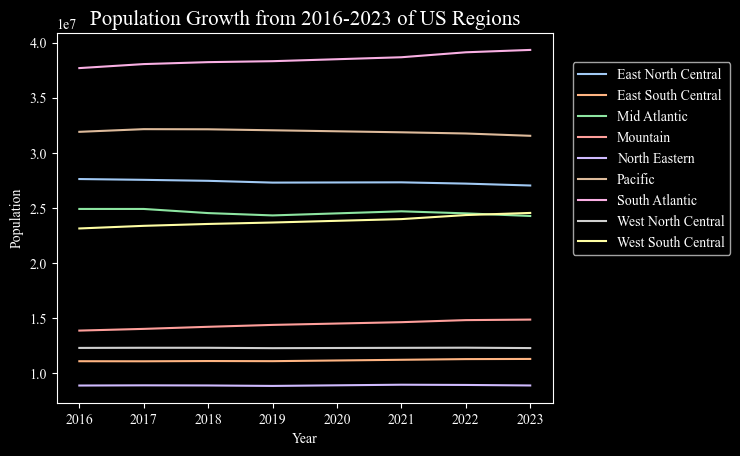

In [50]:
sns.lineplot(regions_grouped_pop, x="year", y="Population_20_64", hue="region", palette="pastel")

plt.xlabel('Year', fontsize=10)
plt.ylabel('Population', fontsize=10)
plt.legend(loc=(1.04, 0.4))
plt.title("Population Growth from 2016-2023 of US Regions",fontsize=15)

/var/folders/2n/l8dyd4dx33738l55vh_kdpkr0000gn/T/ipykernel_5382/1309045274.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0, 0.5, 'EV Registrations')

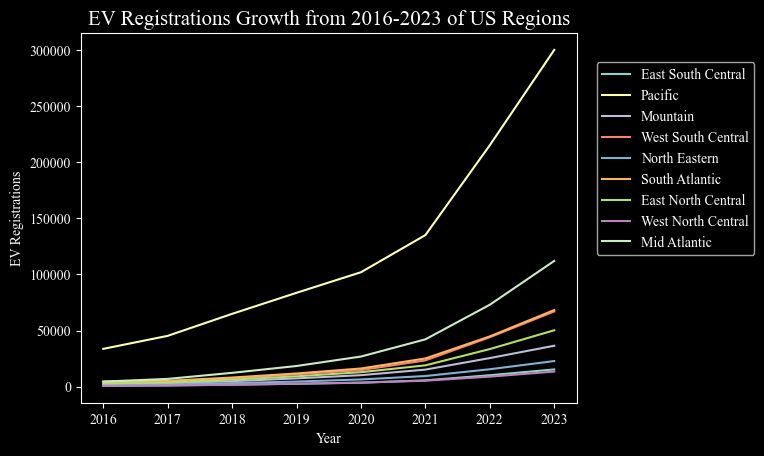

In [51]:
plot_year_EV_rate = sns.lineplot(df_w_region, x="year", y="EV Registrations", hue="region", ci=None)

plt.title("EV Registrations Growth from 2016-2023 of US Regions",fontsize=15)
plt.legend(loc=(1.04, 0.4))
plt.xlabel('Year', fontsize=10)
plt.ylabel('EV Registrations', fontsize=10)

/var/folders/2n/l8dyd4dx33738l55vh_kdpkr0000gn/T/ipykernel_5382/814833267.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0, 0.5, 'EV Share (%)')

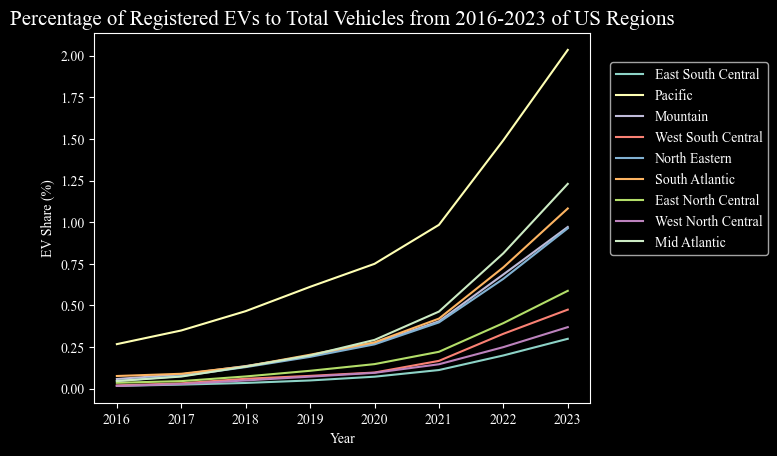

In [52]:
plot_year_EV_rate = sns.lineplot(df_w_region, x="year", y="EV Share (%)", hue="region", ci=None)

plt.title("Percentage of Registered EVs to Total Vehicles from 2016-2023 of US Regions",fontsize=15)
plt.legend(loc=(1.04, 0.4))
plt.xlabel('Year', fontsize=10)
plt.ylabel('EV Share (%)', fontsize=10)

/var/folders/2n/l8dyd4dx33738l55vh_kdpkr0000gn/T/ipykernel_5382/225942479.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0, 0.5, 'Number of Installed Stations')

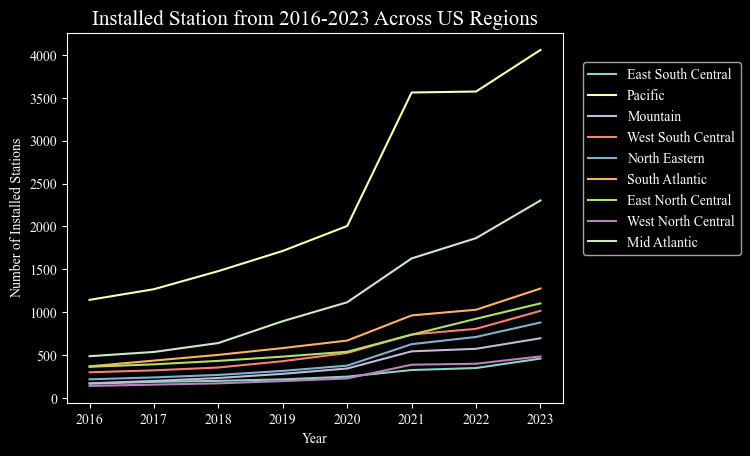

In [53]:
sns.lineplot(df_w_region, x="year", y="Stations", hue="region", ci=None)
plt.title("Installed Station from 2016-2023 Across US Regions",fontsize=15)
plt.legend(loc=(1.04, 0.4))
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Installed Stations', fontsize=10)

Text(0, 0.5, 'Percentage of Registered EVs')

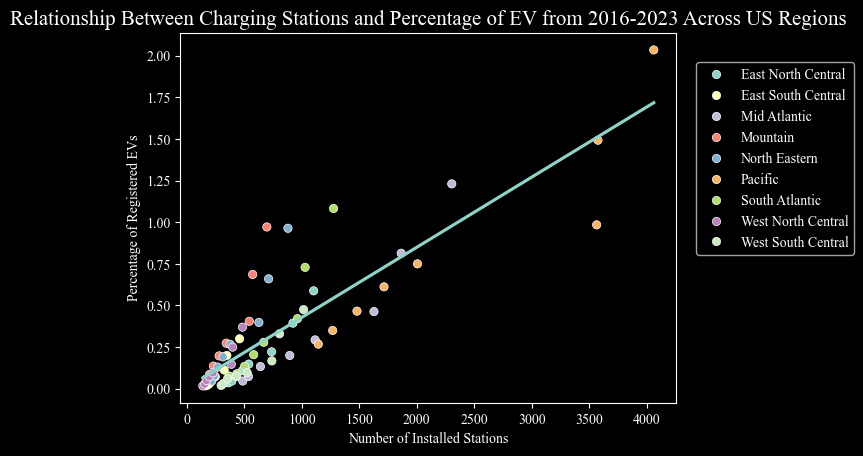

In [54]:
regions_grouped_stations_ev_share = df.groupby(["region", "year"], as_index=False)[["Stations", "EV Share (%)"]].mean()

sns.scatterplot(data=regions_grouped_stations_ev_share, x="Stations", y="EV Share (%)", hue="region")

sns.regplot(data=regions_grouped_stations_ev_share, x="Stations", y="EV Share (%)", scatter=False, ci=False)
plt.title("Relationship Between Charging Stations and Percentage of EV from 2016-2023 Across US Regions", fontsize=15)
plt.legend(loc=(1.04, 0.4))
plt.xlabel('Number of Installed Stations', fontsize=10)
plt.ylabel('Percentage of Registered EVs', fontsize=10)

Text(0, 0.5, 'Number of Registered EVs')

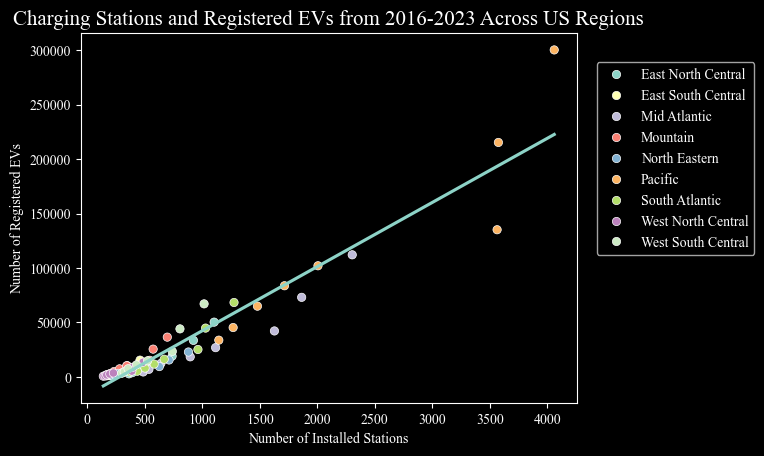

In [55]:
regions_grouped_stations_ev_reg = df.groupby(["region", "year"], as_index=False)[["Stations", "EV Registrations"]].mean()

sns.scatterplot(data=regions_grouped_stations_ev_reg, x="Stations", y="EV Registrations", hue="region")

sns.regplot(data=regions_grouped_stations_ev_reg, x="Stations", y="EV Registrations", scatter=False, ci=False)
plt.title("Charging Stations and Registered EVs from 2016-2023 Across US Regions", fontsize=15)
plt.legend(loc=(1.04, 0.4))
plt.xlabel('Number of Installed Stations', fontsize=10)
plt.ylabel('Number of Registered EVs', fontsize=10)

Text(0, 0.5, 'Percentage of Registered EVs')

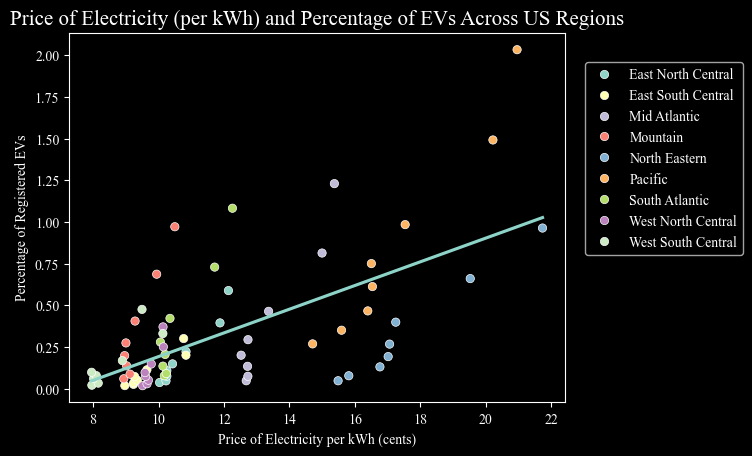

In [56]:
regions_grouped_stations_ev_share = df.groupby(["region", "year"], as_index=False)[["price_cents_per_kwh", "EV Share (%)"]].mean()


sns.scatterplot(data=regions_grouped_stations_ev_share, x="price_cents_per_kwh", y="EV Share (%)", hue="region")

sns.regplot(data=regions_grouped_stations_ev_share, x="price_cents_per_kwh", y="EV Share (%)", scatter=False, ci=False)
plt.title("Price of Electricity (per kWh) and Percentage of EVs Across US Regions", fontsize=15)
plt.legend(loc=(1.04, 0.4))
plt.xlabel('Price of Electricity per kWh (cents)', fontsize=10)
plt.ylabel('Percentage of Registered EVs', fontsize=10)

Text(0, 0.5, 'Number of Registered EVs')

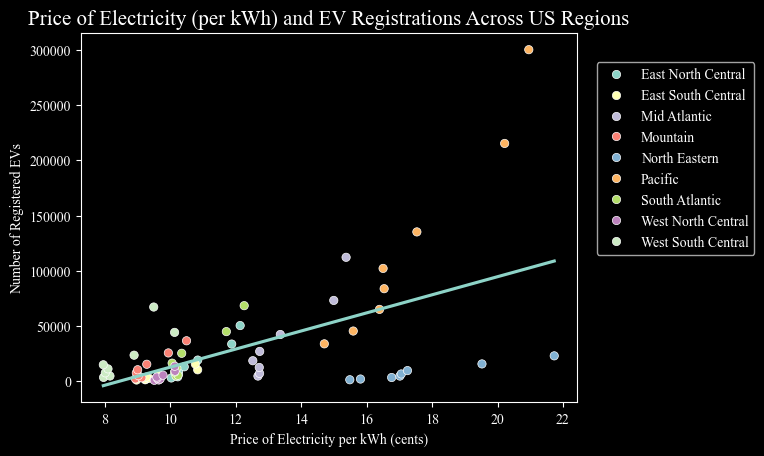

In [57]:
regions_grouped_price_ev_reg = df.groupby(["region", "year"], as_index=False)[["price_cents_per_kwh", "EV Registrations"]].mean()

sns.scatterplot(data=regions_grouped_price_ev_reg, x="price_cents_per_kwh", y="EV Registrations", hue="region")

sns.regplot(data=regions_grouped_price_ev_reg, x="price_cents_per_kwh", y="EV Registrations", scatter=False, fit_reg=True, ci=False)
plt.title("Price of Electricity (per kWh) and EV Registrations Across US Regions", fontsize=15)
plt.legend(loc=(1.04, 0.4))
plt.xlabel('Price of Electricity per kWh (cents)', fontsize=10)
plt.ylabel('Number of Registered EVs', fontsize=10)

Text(0, 0.5, 'Average Income Per Person')

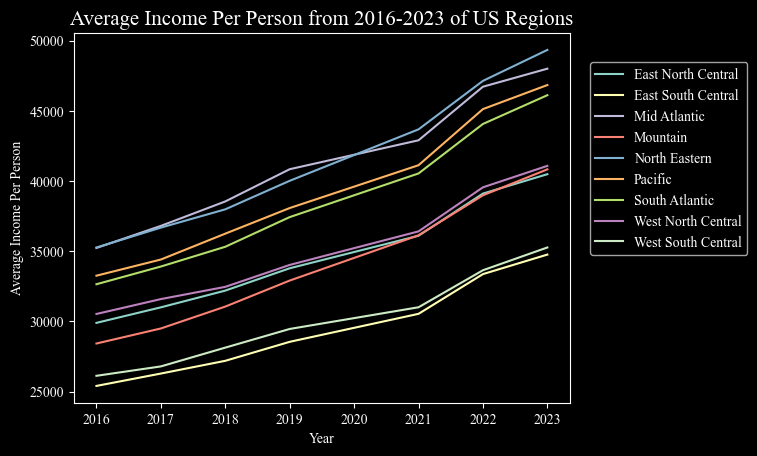

In [58]:
regions_grouped_income_ev_reg = df.groupby(["region", "year"], as_index=False)[["Per_Cap_Income", "EV Registrations"]].mean()

plot_year_per_cap = sns.lineplot(data=regions_grouped_income_ev_reg, x="year", y="Per_Cap_Income", hue="region")

plt.title("Average Income Per Person from 2016-2023 of US Regions", fontsize=15)
plt.legend(loc=(1.04, 0.4))
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average Income Per Person', fontsize=10)

Text(0, 0.5, 'Number of Registered EVs')

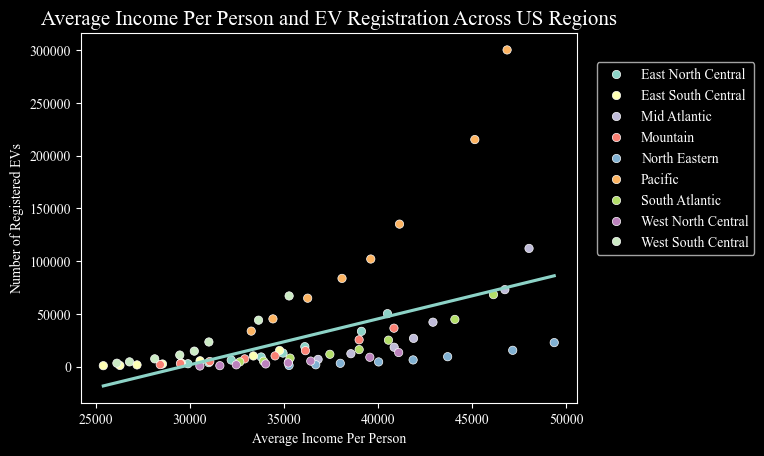

In [59]:
sns.scatterplot(data=regions_grouped_income_ev_reg, x="Per_Cap_Income", y="EV Registrations", hue="region")
sns.regplot(data=regions_grouped_income_ev_reg, x="Per_Cap_Income", y="EV Registrations", scatter=False, fit_reg=True, ci=False)

plt.title("Average Income Per Person and EV Registration Across US Regions", fontsize=15)
plt.legend(loc=(1.04, 0.4))
plt.xlabel('Average Income Per Person', fontsize=10)
plt.ylabel('Number of Registered EVs', fontsize=10)

Text(0, 0.5, 'Number of EV Registered Vehicles')

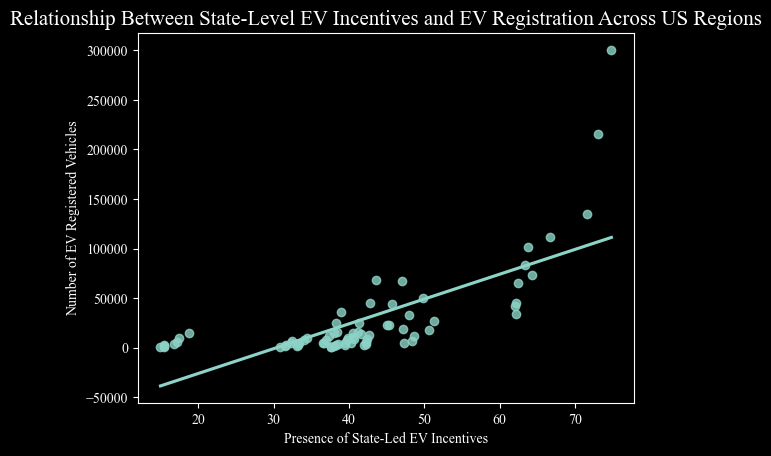

In [60]:
#note that there are null values for every DC incentives cell
regions_grouped_incent_ev_reg = df.groupby(["region", "year"], as_index=False)[["Incentives", "EV Registrations"]].mean()

sns.regplot(regions_grouped_incent_ev_reg, x="Incentives", y="EV Registrations", scatter=True, fit_reg=True, ci=False)

plt.title("Relationship Between State-Level EV Incentives and EV Registration Across US Regions", fontsize=15)
plt.xlabel('Presence of State-Led EV Incentives', fontsize=10)
plt.ylabel('Number of EV Registered Vehicles', fontsize=10)

Text(0, 0.5, 'Number of Registered EVs')

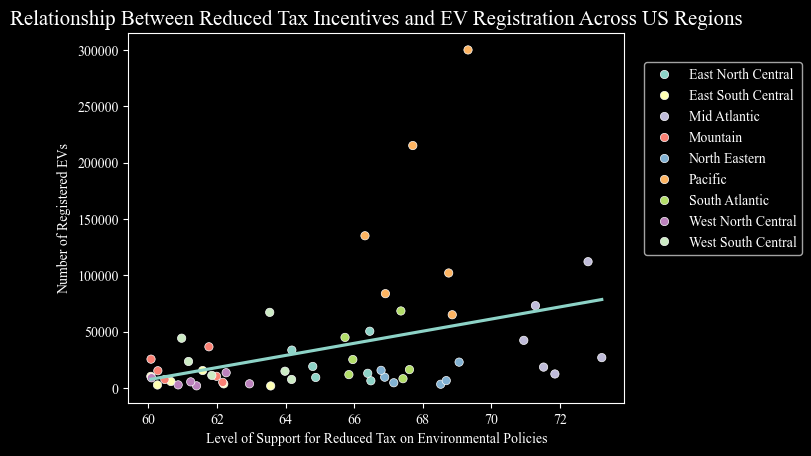

In [66]:
#note, reducetax column has null values prior to 2018
regions_grouped_tax_ev_reg = df.groupby(["region", "year"], as_index=False)[["reducetax", "EV Registrations"]].mean()

sns.scatterplot(data=regions_grouped_tax_ev_reg, x="reducetax", y="EV Registrations", hue="region")
sns.regplot(data=regions_grouped_tax_ev_reg, x="reducetax", y="EV Registrations", scatter=False, fit_reg=True, ci=False)
plt.title("Relationship Between Reduced Tax Incentives and EV Registration Across US Regions", fontsize=15)
plt.legend(loc=(1.04, 0.4))
plt.xlabel('Level of Support for Reduced Tax on Environmental Policies', fontsize=10)
plt.ylabel('Number of Registered EVs', fontsize=10)

Text(0, 0.5, 'Number of Registered EV')

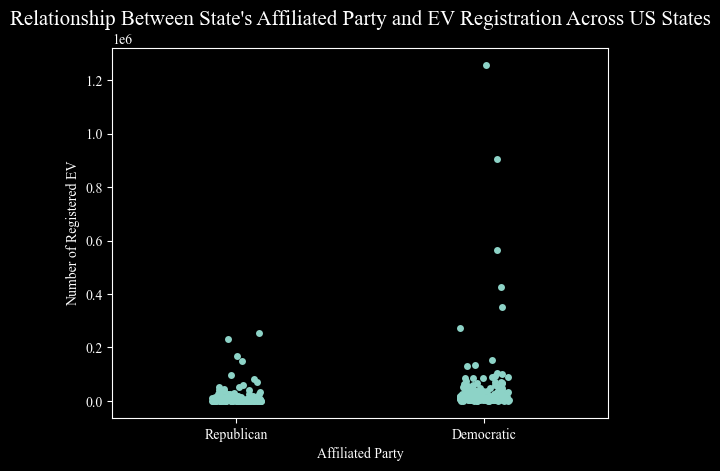

In [62]:
states_grouped_party_ev_reg = df.groupby(["state", "year"], as_index=False).agg({"Party": "first","EV Registrations": "mean"})
sns.stripplot(data=states_grouped_party_ev_reg, x="Party", y="EV Registrations")

plt.title("Relationship Between State's Affiliated Party and EV Registration Across US States", fontsize=15)
plt.xlabel('Affiliated Party', fontsize=10)
plt.ylabel('Number of Registered EV', fontsize=10)

/var/folders/2n/l8dyd4dx33738l55vh_kdpkr0000gn/T/ipykernel_5382/1760875066.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0, 0.5, 'Percentage of Registered EVs to Total Vehicles')

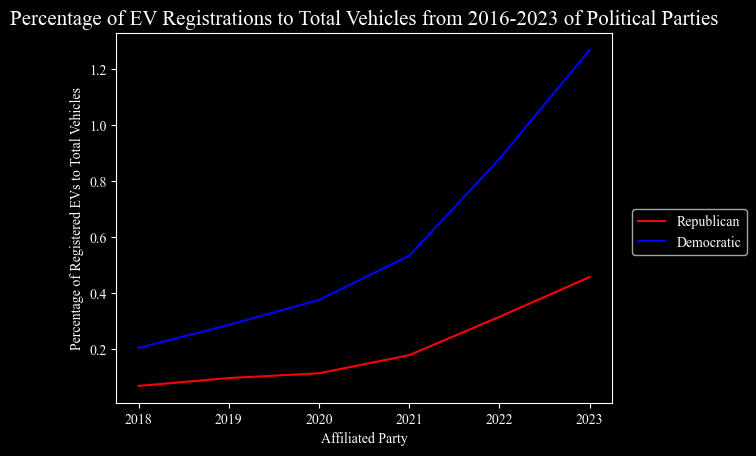

In [63]:
plot_year_EV_rate = sns.lineplot(df_w_region, x="year", y="EV Share (%)", hue="Party", palette=["#FF0000", "#0000FF"], ci=None)

plt.title("Percentage of EV Registrations to Total Vehicles from 2016-2023 of Political Parties", fontsize=15)
plt.legend(loc=(1.04, 0.4))
plt.xlabel('Affiliated Party', fontsize=10) 
plt.ylabel('Percentage of Registered EVs to Total Vehicles', fontsize=10)

In [96]:
import plotly.express as px

state_abbrev = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District Of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
    'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

df_ave_EV_percent = df.groupby("state", as_index=False).agg({"EV Share (%)": "mean"})

df_ave_EV_percent["state_code"] = df_ave_EV_percent["state"].map(state_abbrev)

tips_df = px.data.tips()

custom_pastel_map = [[0.0,"#ff4d6d"],[0.125,"#ff914d"],[0.25,"#ffe74d"],
                          [0.375,"#9dff4d"],[0.5,"#4dffb8"],[0.625,"#39e5ff"],
                          [0.75,"#4d9dff"],[0.875,"#583bff"],[1.0,"#0004FB"]]



fig = px.choropleth(df_ave_EV_percent, locations="state_code", locationmode="USA-states", 
                    color="EV Share (%)", color_continuous_scale=custom_pastel_map, scope="usa", 
                    title="Average EV Percentage Across States (2016-2023)")

fig.update_layout(font_family="Times New Roman", legend=dict(title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"),
                    paper_bgcolor="black", plot_bgcolor="black", font_color="white")
fig.update_geos(bgcolor="black",lakecolor="black",landcolor="black", subunitcolor="white", showland=True,showlakes=True)

fig.show()


In [108]:
tax_corr_by_region = regions_grouped_tax_ev_reg.groupby("region").apply(lambda g: g["reducetax"].corr(g["EV Registrations"]))
income_corr_by_region = regions_grouped_income_ev_reg.groupby("region").apply(lambda g: g["Per_Cap_Income"].corr(g["EV Registrations"]))
incent_corr_by_region = regions_grouped_incent_ev_reg.groupby("region").apply(lambda g: g["Incentives"].corr(g["EV Registrations"]))
stations_corr_by_region = regions_grouped_stations_ev_reg.groupby("region").apply(lambda g: g["Stations"].corr(g["EV Registrations"]))
price_corr_by_region = regions_grouped_price_ev_reg.groupby("region").apply(lambda g: g["price_cents_per_kwh"].corr(g["EV Registrations"]))

all_corrs = pd.DataFrame({"Reduced Tax": tax_corr_by_region,"Income": income_corr_by_region,"Government Incentives": incent_corr_by_region,
                          "Charging Stations": stations_corr_by_region,"Price": price_corr_by_region})

corrs_long = all_corrs.reset_index().melt(id_vars="region", var_name="Factors", value_name="Correlation")

fig = px.bar(corrs_long, orientation='h',x="Correlation", y="region", color="Factors", barmode="group",
             title="Correlation of Factors with EV Registrations by Region")
fig.update_layout(paper_bgcolor="black", plot_bgcolor="black", font_color="white", font_family="Times New Roman", font_size=16,
                  legend=dict(orientation="h", yanchor="bottom",y=-0.6, xanchor="center", x=0.5))

fig.update_yaxes(title_text="")

/var/folders/2n/l8dyd4dx33738l55vh_kdpkr0000gn/T/ipykernel_5382/2229750417.py:1: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/2n/l8dyd4dx33738l55vh_kdpkr0000gn/T/ipykernel_5382/2229750417.py:2: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/2n/l8dyd4dx33738l55vh_kdpkr0000gn/T/ipykernel_5382/2229750417.py:3: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavio

In [95]:
sum_of_ev = df.groupby("year")["EV Registrations"].sum()

percentage_change = sum_of_ev.pct_change()

print(percentage_change, sum_of_ev)



year
2016         NaN
2017    0.345344
2018    0.518430
2019    0.368495
2020    0.300281
2021    0.427422
2022    0.679249
2023    0.455964
Name: EV Registrations, dtype: float64 year
2016     280300
2017     377100
2018     572600
2019     783600
2020    1018900
2021    1454400
2022    2442300
2023    3555900
Name: EV Registrations, dtype: int64


In [117]:
station_totals = df[df["year"]==2023][["Level 1", "Level 2", "DC Fast"]].sum()


fig = px.pie(values=station_totals.values, names=station_totals.index,title="Distribution of Charging Station Types in the US",color=station_totals.index,color_discrete_map={"Level 1":"#FF69B4", "Level 2":"#FFD700", "DC Fast":"#00C0C0"})

fig.update_layout(paper_bgcolor="black",font=dict(color="white", family="Times New Roman", size=16))

fig.show()


In [122]:
sum_charging_stations = df[df["year"]==2023]["Total Charging Outlets"].sum() 
sum_charging_stations

np.int64(176032)